In [13]:
using UrlDownload, Plots, DataFrames, MLJ, Random, StatsPlots

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.dat";
feature_names = ["age", "sex", "chest_pain", "rest_bp", "serum_cholestrol", "fasting_blood_sugar", "rest_ECG", "max_HR", "ex_ind_ang", "oldpeak",
"slope", "major_vessel", "thal","heart_dis"]
data = urldownload(url, true, format = :CSV, header = feature_names);
stat_log = DataFrame(data)
describe(stat_log)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,age,54.4333,29.0,55.0,77.0,0,Float64
2,sex,0.677778,0.0,1.0,1.0,0,Float64
3,chest_pain,3.17407,1.0,3.0,4.0,0,Float64
4,rest_bp,131.344,94.0,130.0,200.0,0,Float64
5,serum_cholestrol,249.659,126.0,245.0,564.0,0,Float64
6,fasting_blood_sugar,0.148148,0.0,0.0,1.0,0,Float64
7,rest_ECG,1.02222,0.0,2.0,2.0,0,Float64
8,max_HR,149.678,71.0,153.5,202.0,0,Float64
9,ex_ind_ang,0.32963,0.0,0.0,1.0,0,Float64


In [14]:
################# Assessing the data ##############################

In [61]:
describe(stat_log)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,age,54.4333,29.0,55.0,77.0,0,Float64
2,sex,0.677778,0.0,1.0,1.0,0,Float64
3,chest_pain,3.17407,1.0,3.0,4.0,0,Float64
4,rest_bp,131.344,94.0,130.0,200.0,0,Float64
5,serum_cholestrol,249.659,126.0,245.0,564.0,0,Float64
6,fasting_blood_sugar,0.148148,0.0,0.0,1.0,0,Float64
7,rest_ECG,1.02222,0.0,2.0,2.0,0,Float64
8,max_HR,149.678,71.0,153.5,202.0,0,Float64
9,ex_ind_ang,0.32963,0.0,0.0,1.0,0,Float64


In [62]:
schema(stat_log)

┌─────────────────────┬─────────┬────────────┐
│ _.names             │ _.types │ _.scitypes │
├─────────────────────┼─────────┼────────────┤
│ age                 │ Float64 │ Continuous │
│ sex                 │ Float64 │ Continuous │
│ chest_pain          │ Float64 │ Continuous │
│ rest_bp             │ Float64 │ Continuous │
│ serum_cholestrol    │ Float64 │ Continuous │
│ fasting_blood_sugar │ Float64 │ Continuous │
│ rest_ECG            │ Float64 │ Continuous │
│ max_HR              │ Float64 │ Continuous │
│ ex_ind_ang          │ Float64 │ Continuous │
│ oldpeak             │ Float64 │ Continuous │
│ slope               │ Float64 │ Continuous │
│ major_vessel        │ Float64 │ Continuous │
│ thal                │ Float64 │ Continuous │
│ heart_dis           │ Int64   │ Count      │
└─────────────────────┴─────────┴────────────┘
_.nrows = 270


In [16]:
##### Exploratory data analysis and visualization ###################

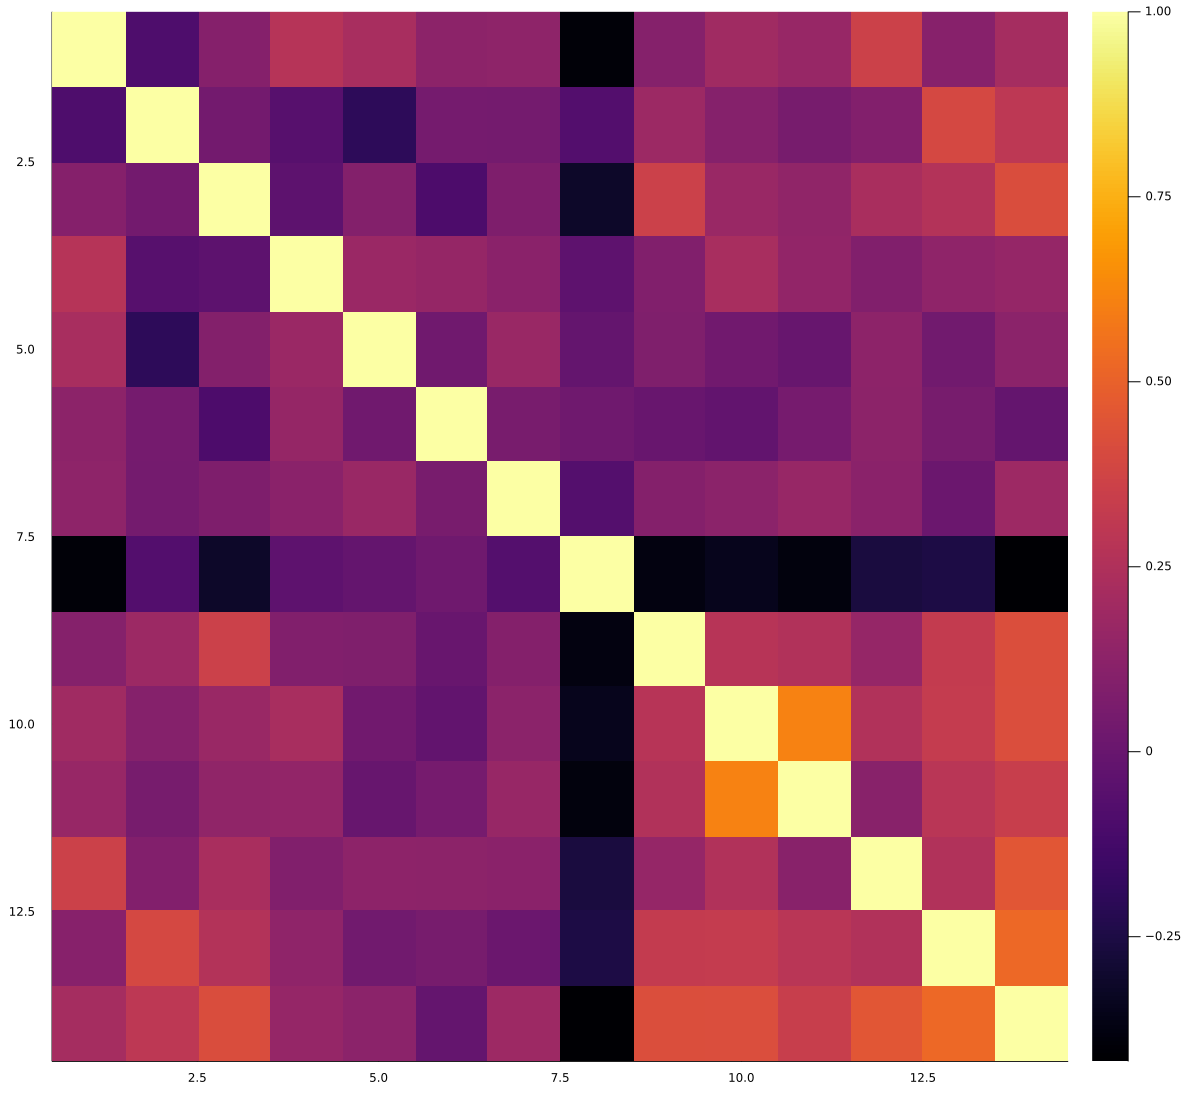

In [60]:
using Statistics
cor_s = cor(Matrix(stat_log))
heatmap(cor_s,yflip=true, fmt = :png)    ## Correlation Matrix

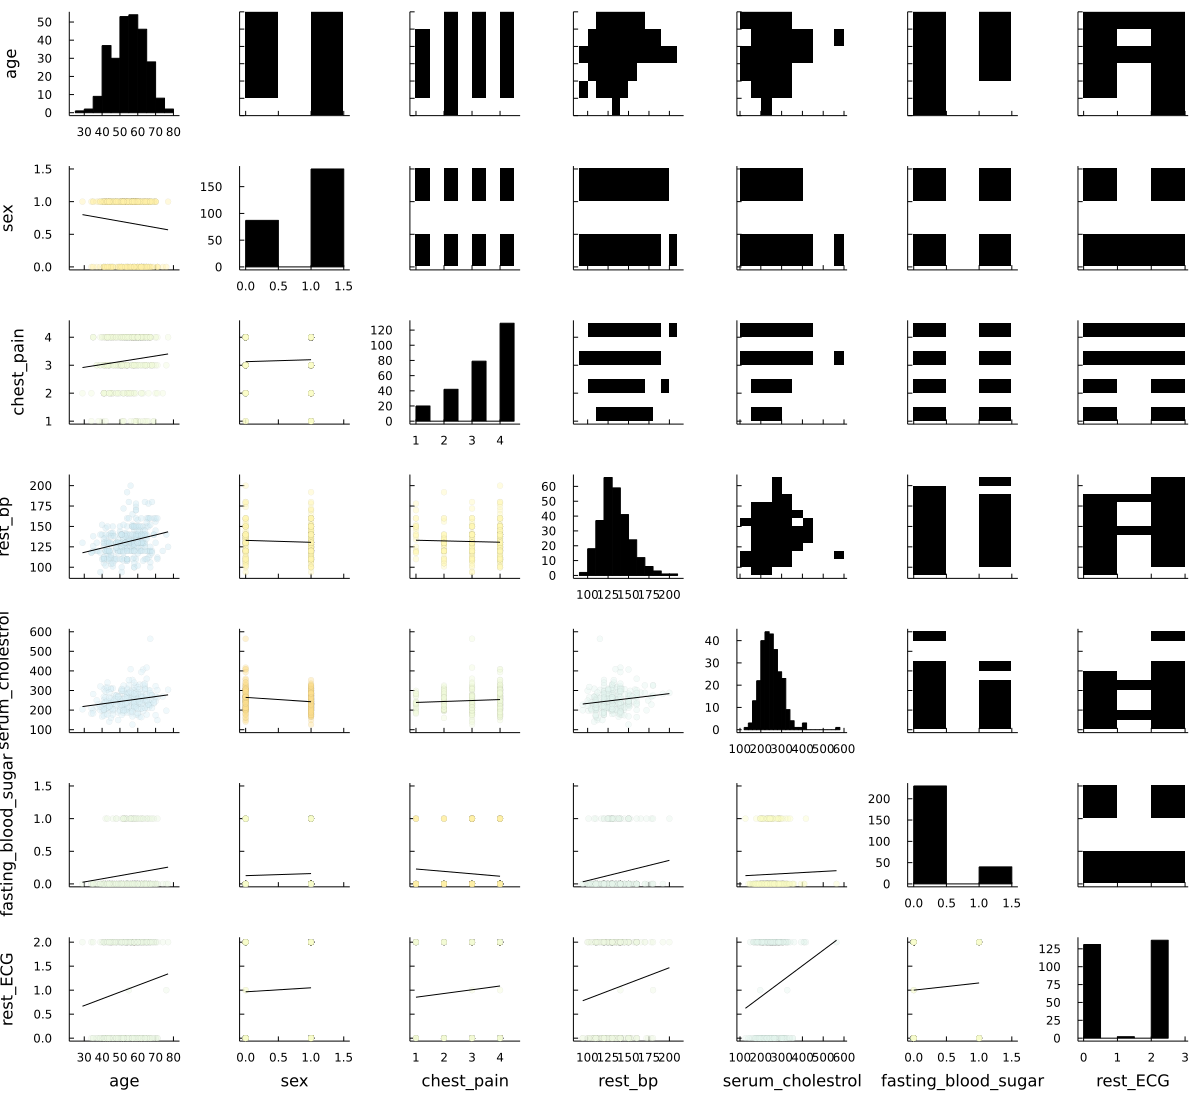

In [63]:
using StatsPlots
gr(size = (1200, 1100))
@df stat_log corrplot(cols(1:7), grid = false, fmt = :png)

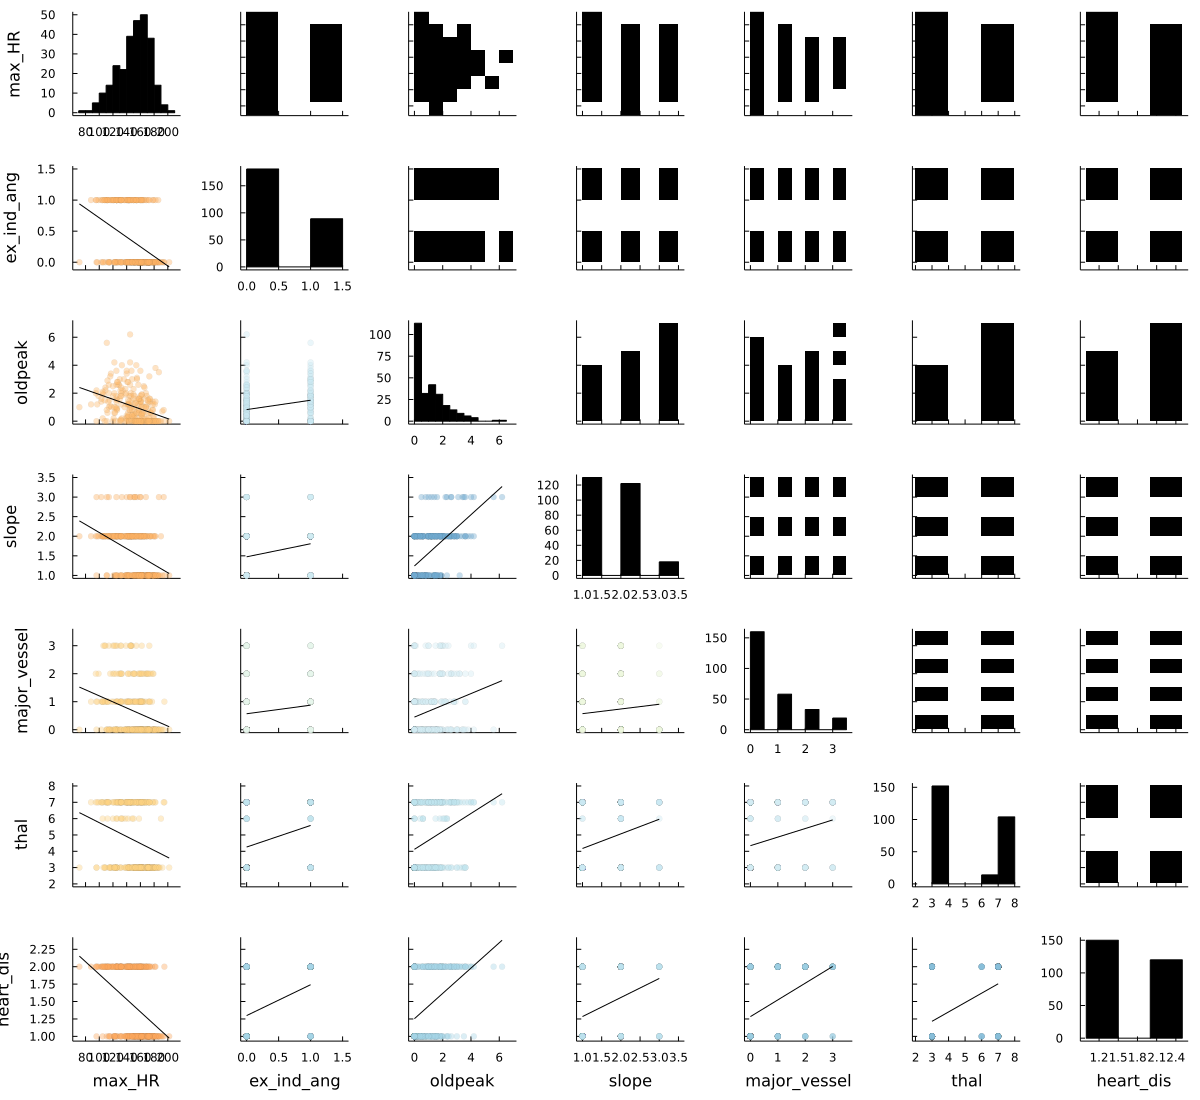

In [64]:
gr(size = (1200, 1100))
@df stat_log corrplot(cols(8:14), grid = false, fmt = :png)

In [66]:
using Interact, Blink
w = Window()
body!(w, dataviewer(stat_log))  #### This will give an interactive pop-up window where we can select different types of plots for different variables

names = map(collect ∘ keys, coltable) = Observable{Vector{Symbol}} with 0 listeners. Value:
[:age, :sex, :chest_pain, :rest_bp, :serum_cholestrol, :fasting_blood_sugar, :rest_ECG, :max_HR, :ex_ind_ang, :oldpeak, :slope, :major_vessel, :thal, :heart_dis]


Page(4, WebSocket(server, CONNECTED), Dict{String, Any}("webio" => Blink.AtomShell.var"#22#23"{Blink.AtomShell.WebIOBlinkComm}(Blink.AtomShell.WebIOBlinkComm(Window(4, Electron(Process(`'C:\Users\kapil\.julia\packages\Blink\mwJC9\deps\atom\electron.exe' 'C:\Users\kapil\.julia\packages\Blink\mwJC9\src\AtomShell\main.js' port 9335`, ProcessRunning), Sockets.TCPSocket(Base.Libc.WindowsRawSocket(0x00000000000014c0) active, 0 bytes waiting), Dict{String, Any}("callback" => Blink.var"#1#2"())), Page(#= circular reference @-5 =#), Task (done) @0x0000000077d0d5f0))), "callback" => Blink.var"#1#2"()), Distributed.Future(1, 1, 4, Some(true)))

In [67]:
################ Correlation Cofficients  #########################

In [68]:
y = stat_log.heart_dis
for i in 1:13     # to get the Cor coffiecients for all the variables against y
    println(cor(stat_log[:,i],y))
end
                        

0.21232218744342843
0.2977207557240849
0.4174362056278523
0.15538265617576877
0.11802053060516997
-0.016318834144205478
0.18209075568278282
-0.4185139653265938
0.41930270919029683
0.4179674372274267
0.33761595723299054
0.45533645047270865
0.5250203329618747
